## Project 2


In [63]:

import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [64]:
# read in the data to dataframe called heat
heat = pd.read_csv(" https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/DTSC2301_Project2.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
heat.replace([' ?'],np.nan)
heat = heat.dropna()
# show information about the dataframe
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RelCompactness   768 non-null    float64
 1   SurfaceArea      768 non-null    float64
 2   WallArea         768 non-null    float64
 3   RoofArea         768 non-null    float64
 4   OverallHgt       768 non-null    float64
 5   Orientation      768 non-null    float64
 6   GlazingArea      768 non-null    float64
 7   GlazingAreaDist  768 non-null    float64
 8   HeatingLoad      768 non-null    float64
dtypes: float64(9)
memory usage: 60.0 KB


In [65]:
#print(heat.columns)
heat_df=heat[['RelCompactness','SurfaceArea','WallArea','OverallHgt','RoofArea','Orientation','GlazingArea','GlazingAreaDist']]

In [66]:
X=heat_df
y=heat['HeatingLoad']

In [67]:
# create a function called processSubset to fit the models and return information about
# the model as well as the RMSE
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    #X=sm.add_constant(X[list(feature_set)])
    model = sm.OLS(y,sm.add_constant(X[list(feature_set)]))
    regr = model.fit()
    RMSE = np.sqrt(((regr.predict(sm.add_constant(X[list(feature_set)])) - y) ** 2).mean())
    return {"model":regr, "RMSE":RMSE}

In [68]:
def getBest(k):
    # start tracking the time 
    tic = time.time()
    # create an array to put the results
    results = []
    
    # do all combinations of predictors 
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the smallest RMSE
    best_model = models.loc[models['RMSE'].argmin()]
    
    # stop tracking the time
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [69]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RMSE", "model"])

tic = time.time()
for i in range(0,9):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 1 models on 0 predictors in 0.02536630630493164 seconds.
Processed 8 models on 1 predictors in 0.06598758697509766 seconds.
Processed 28 models on 2 predictors in 0.17682504653930664 seconds.
Processed 56 models on 3 predictors in 0.460369348526001 seconds.
Processed 70 models on 4 predictors in 0.5953783988952637 seconds.
Processed 56 models on 5 predictors in 0.4532496929168701 seconds.
Processed 28 models on 6 predictors in 0.13710546493530273 seconds.
Processed 8 models on 7 predictors in 0.025225162506103516 seconds.
Processed 1 models on 8 predictors in 0.0054454803466796875 seconds.
Total elapsed time: 1.9700946807861328 seconds.


In [70]:
models_best

,RMSE,model
0,10.083624,<statsmodels.regression.linear_model.Regressio...
1,4.608923,<statsmodels.regression.linear_model.Regressio...
2,3.720009,<statsmodels.regression.linear_model.Regressio...
3,3.027299,<statsmodels.regression.linear_model.Regressio...
4,2.94357,<statsmodels.regression.linear_model.Regressio...
5,2.92735,<statsmodels.regression.linear_model.Regressio...
6,2.919111,<statsmodels.regression.linear_model.Regressio...
7,2.918994,<statsmodels.regression.linear_model.Regressio...
8,2.918994,<statsmodels.regression.linear_model.Regressio...


In [76]:
# here is the best model with 2 predictors is counted as a predictor
print(models_best.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2428.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:54:32   Log-Likelihood:                -2098.7
No. Observations:                 768   AIC:                             4203.
Df Residuals:                     765   BIC:                             4217.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.3890      0.487    -19.288      

In [82]:
# Show the best 8-variable model 
print(getBest(8)["model"].summary())

Processed 1 models on 8 predictors in 0.008575916290283203 seconds.
                            OLS Regression Results                            
Dep. Variable:            HeatingLoad   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:57:16   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [73]:
models_best.loc[5, "model"].rsquared

0.9157216505746988

In [74]:
# Gets the second element from each row ('model') and pulls out its rsquared attribute
models_best.apply(lambda row: row[1].rsquared, axis=1)

C:\Users\ajjen\AppData\Local\Temp\ipykernel_16572\3287597919.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models_best.apply(lambda row: row[1].rsquared, axis=1)


0    0.000000
1    0.791087
2    0.863901
3    0.909868
4    0.914785
5    0.915722
6    0.916195
7    0.916202
8    0.916202
dtype: float64

As expected, the $r^2$ statistic increases monotonically as more
variables are included.  This happens even if the added predictor has little value; that's 
part of the reason that we introduced $r^2_{adj}$.

Plotting RSS, adjusted $r^2$, AIC, and BIC for all of the models at once will
help us decide which model to select. 

Akaike's Information Criterion (AIC) and Bayesian Information Criterion (BIC) are two other metrics for penalizing extra terms in a model.  While $r^2_{adj}$ works well for regression,
AIC and BIC are more general for a larger class of models.  For both AIC and BIC we want the smallest values we can get. 

C:\Users\ajjen\AppData\Local\Temp\ipykernel_16572\1196503365.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)
C:\Users\ajjen\AppData\Local\Temp\ipykernel_16572\1196503365.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aic = models_best.apply(lambda row: row[1].aic, axis=1)
C:\Users\ajjen\AppData\Local\Temp\ipykernel_16572\1196503365.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value

Text(0, 0.5, 'BIC')

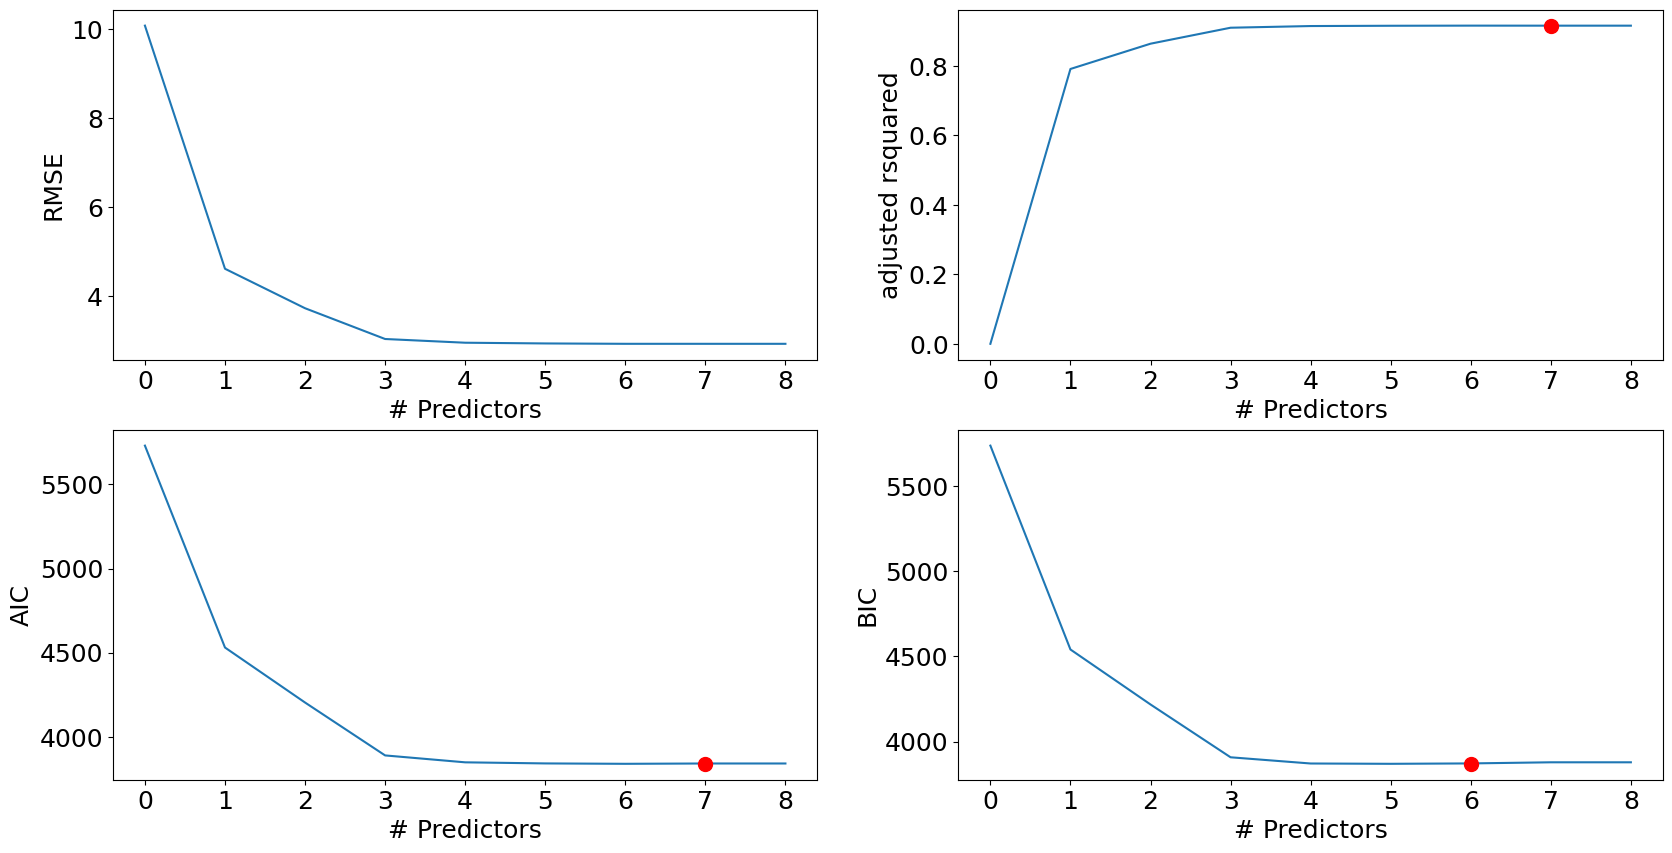

In [75]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RMSE"])
plt.xlabel('# Predictors')
plt.ylabel('RMSE')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector

rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax()+1, rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin()+1, aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin()+1, bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')